In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv('/content/online_shoppers_intention.csv')

In [101]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [102]:
print("\nMissing values in the dataset &")
print("\nData types of each column:\n")
df.info()


Missing values in the dataset &

Data types of each column:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region        

In [103]:
# Check the balance of the target variable 'Revenue'
print("\nDistribution of the target variable 'Revenue':")
print(df['Revenue'].value_counts(normalize=True))


Distribution of the target variable 'Revenue':
Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64


In [104]:
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                      'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'SpecialDay']

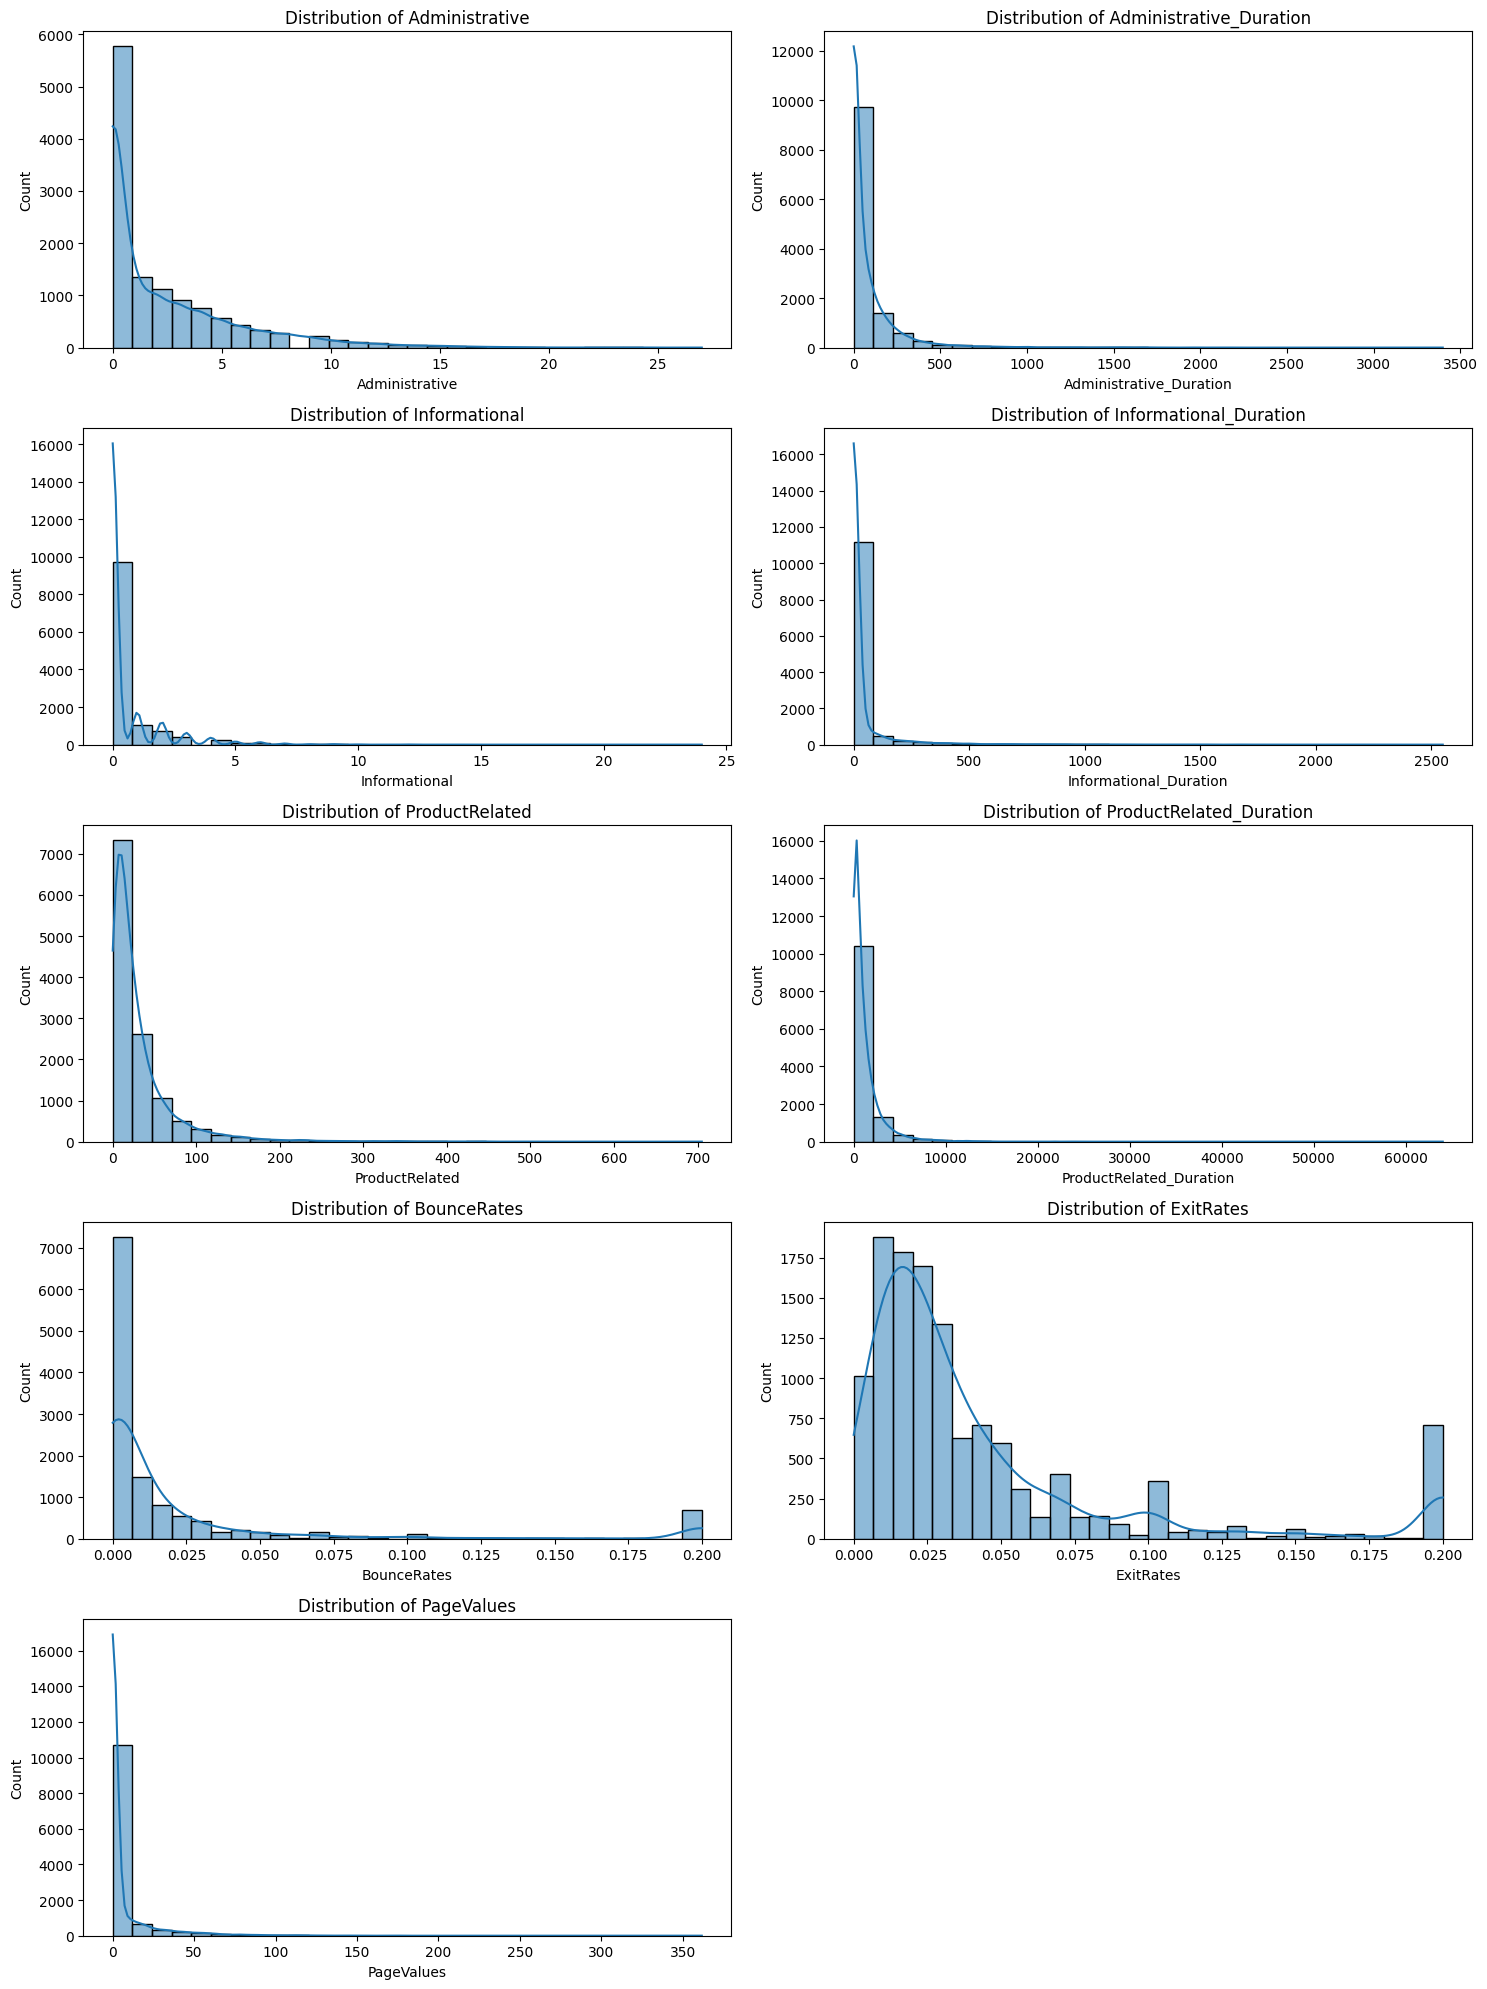

In [105]:
# Univariate Analysis - Numerical Features

# Plot histograms for numerical features
plt.figure(figsize=(15, 20))
for i, feature in enumerate(numerical_features):
    plt.subplot(5, 2, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


## Distribution Analysis of Website Metrics

### Administrative Pages:
- The majority of sessions have a very low number of administrative pages viewed, typically between 0 and 5.
- There are very few sessions with more than 5 administrative page views.

### Administrative Duration:
- Most sessions have a short administrative duration, predominantly between 0 and 500 seconds.
- Very few sessions exceed this duration.

### Informational Pages:
- Similar to administrative page views, most sessions have a low count of informational page views, usually between 0 and 5.
- Sessions with more than 5 informational page views are rare.

### Informational Duration:
- The informational duration is also mostly short, typically between 0 and 500 seconds.
- Longer durations are much less common.

### Product-Related Pages:
- The distribution shows that most sessions have a small number of product-related page views, commonly between 0 and 100.
- A significant drop is observed after 100 product-related page views.

### Product-Related Duration:
- Most sessions have a short duration spent on product-related pages, predominantly between 0 and 10000 seconds.
- There are very few sessions with a duration exceeding this range.

### Bounce Rates:
- The bounce rates are highly skewed towards the lower end, with most sessions having a bounce rate between 0 and 0.05.
- Bounce rates higher than 0.1 are less frequent, with a notable peak near 0.2.

### Exit Rates:
- The exit rates are more evenly distributed compared to bounce rates.
- There is a peak in the 0.025 to 0.05 range, with another peak near 0.2, indicating multiple modes in the distribution.

### Page Values:
- The majority of sessions have low page values, commonly between 0 and 50.
- There are very few sessions with high page values, leading to a steep drop after the initial peak.

## General Conclusions:
- Skewed Distributions: Most distributions are right-skewed, indicating that a large proportion of sessions have low values for these variables, with fewer sessions having higher values.
- User Behavior: Users generally engage minimally with administrative and informational pages and spend relatively short durations on them. Most user interactions seem to be concentrated in shorter time frames and fewer pages.
- Bounce and Exit Rates: Bounce rates are heavily skewed towards lower values, suggesting that many sessions have low bounce rates. However, exit rates show a more varied distribution, indicating different user behaviors in leaving the site.
- Page Value: The low page values for most sessions suggest that high-value pages are not commonly reached or interacted with by the majority of users.
These distributions can help inform strategies for improving user engagement and understanding user behavior on the website.


## Based on the distribution analysis:

- **Administrative and Informational Metrics**: Low counts and short durations suggest minimal impact on revenue prediction.
- **Product-Related Metrics**: Despite majority having low counts and durations, a significant drop after a threshold indicates potential relevance.
- **Bounce and Exit Rates**: Skewed distributions indicate varying user behaviors; both are valuable for understanding engagement and site abandonment.
- **Page Values**: Majority have low values, suggesting limited interaction with high-value pages.



<Axes: xlabel='OperatingSystems'>

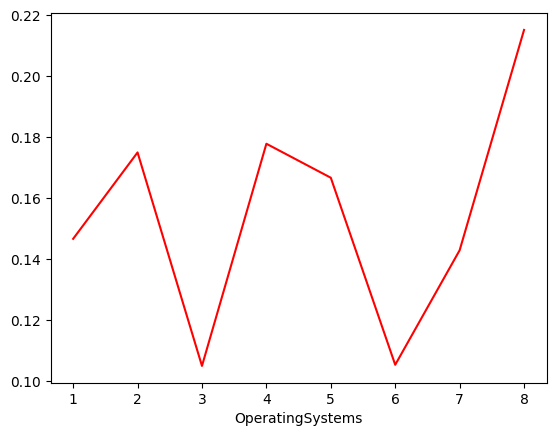

In [106]:
# @title Average Visitors by Operating Systems

df.groupby('OperatingSystems')['Revenue'].mean().plot(kind='line', color='red')

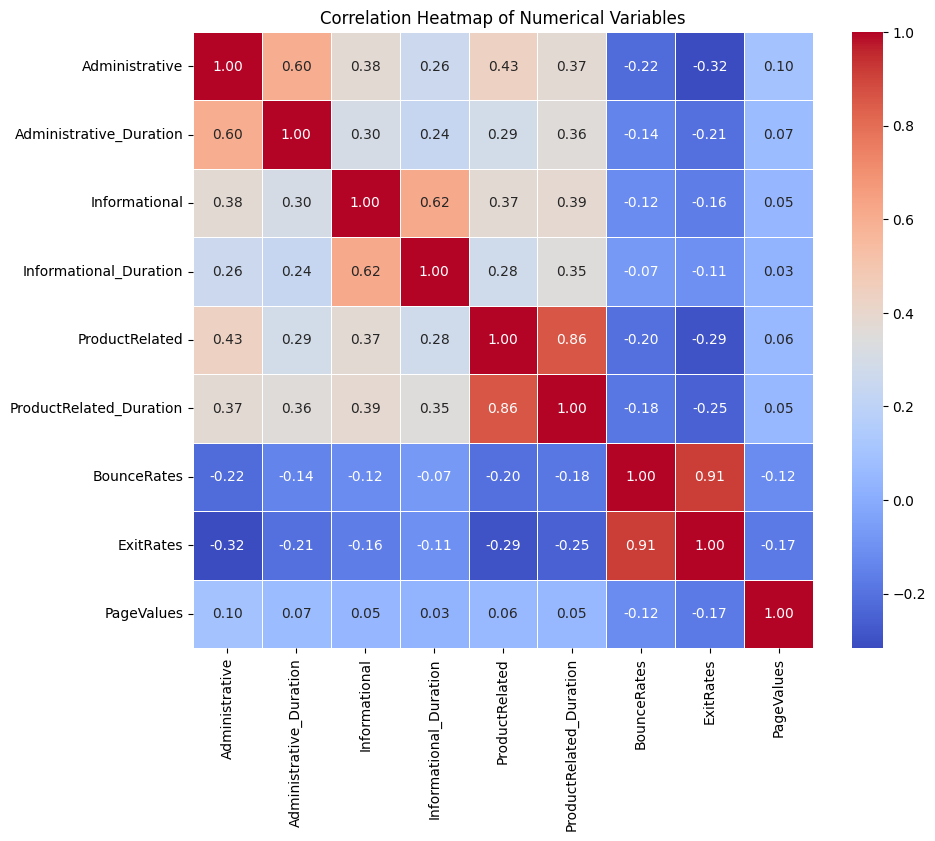

In [107]:
# Compute the correlation matrix
corr = df[numerical_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

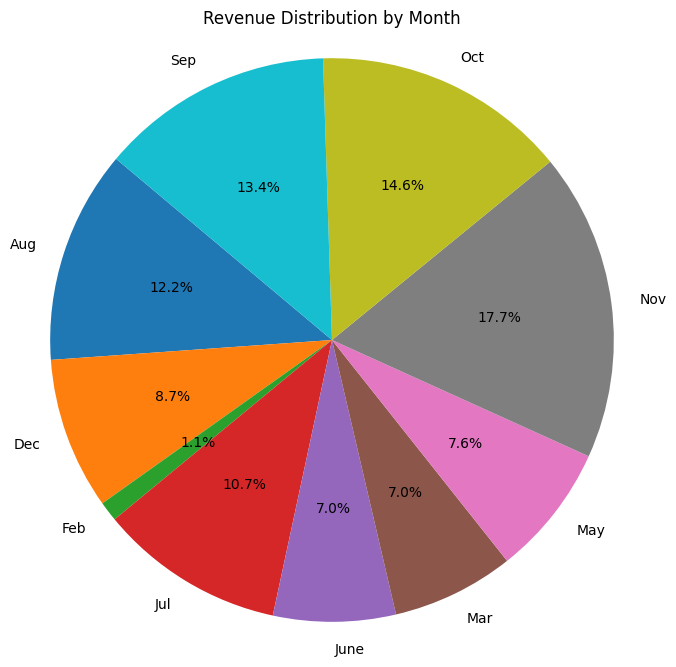

In [108]:
import matplotlib.pyplot as plt

# Calculate the total revenue for each month
revenue_by_month = df.groupby('Month')['Revenue'].mean()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_month, labels=revenue_by_month.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Distribution by Month')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


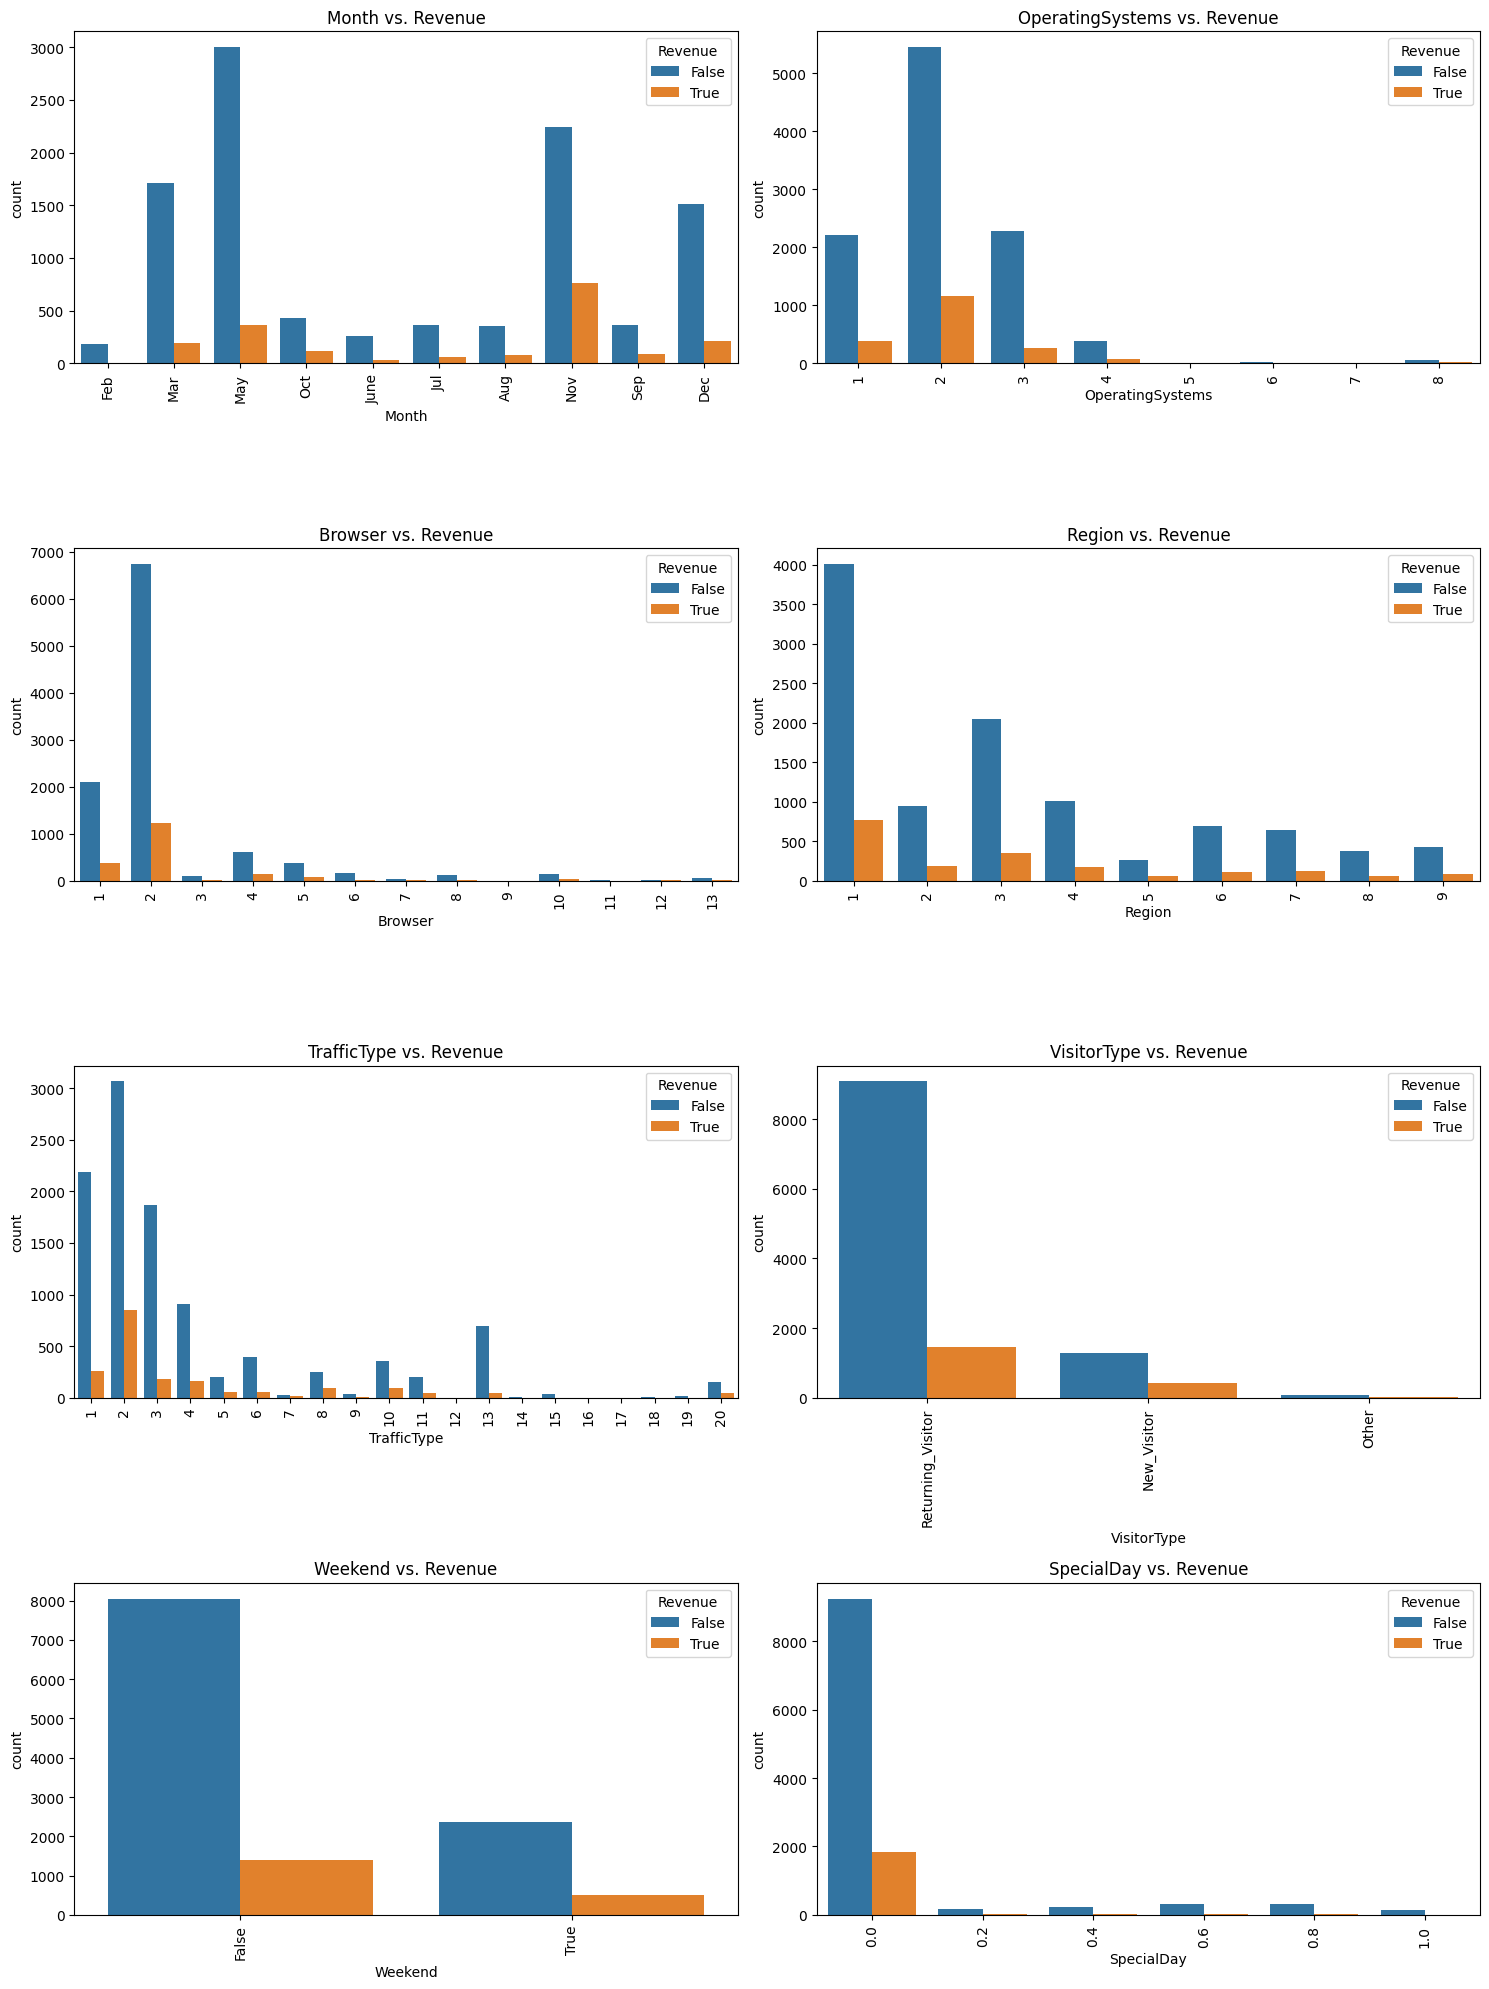

In [109]:
# Bivariate Analysis - Categorical Features vs. Revenue
plt.figure(figsize=(15, 20))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 2, i+1)
    sns.countplot(data=df, x=feature, hue='Revenue')
    plt.title(f'{feature} vs. Revenue')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Month vs. Revenue:

- Revenue is higher in March, May, and November, with significant counts of sessions leading to revenue (orange bars).
- February and December have relatively low counts of sessions, with even fewer resulting in revenue.
- Most other months show a low conversion to revenue.

## Operating Systems vs. Revenue:

- The majority of sessions occur on Operating Systems 1 and 2.
- Both OS 1 and OS 2 have higher counts of sessions that result in revenue compared to other operating systems.
- Other operating systems (3, 4, 5, 6, 7, 8) show very low counts and minimal revenue generation.

## Browser vs. Revenue:

- Browsers 1 and 2 dominate in terms of session counts.
- Both also show a higher number of sessions leading to revenue.
- Other browsers (3 through 13) have significantly lower counts, with minimal sessions generating revenue.

## Region vs. Revenue:

- Regions 1 and 3 have the highest session counts, with a notable portion leading to revenue.
- Region 2 also shows a relatively higher count with some revenue generation.
- Other regions (4 through 9) have fewer sessions and correspondingly lower revenue outcomes.

## TrafficType vs. Revenue:

- Traffic types 2 and 1 have the highest session counts, with a significant portion converting to revenue.
- Traffic types 3 and 4 also show a moderate count with some revenue generation.
- The remaining traffic types (5 through 20) have lower session counts and minimal revenue generation.

## VisitorType vs. Revenue:

- Returning visitors have the highest session counts and generate more revenue.
- New visitors also contribute to revenue but at a much lower rate compared to returning visitors.
- 'Other' visitor type has very few sessions and minimal revenue.

## Weekend vs. Revenue:

- There are more sessions on weekdays (False) compared to weekends (True).
- Both weekdays and weekends show revenue generation, but weekdays have a higher absolute count.

## SpecialDay vs. Revenue:

- The majority of sessions occur on non-special days (0.0), with a higher count leading to revenue.
- Special days (0.2 through 1.0) have significantly fewer sessions, with some resulting in revenue but at a much lower rate.

## General Conclusions:

- High-Performing Months: March, May, and November are strong months for revenue generation.
- Dominant OS and Browsers: Sessions on Operating Systems 1 and 2, and Browsers 1 and 2, are more likely to generate revenue.
- Region Performance: Regions 1 and 3 are the top performers in terms of session counts and revenue generation.
- Effective Traffic Types: Traffic types 1 and 2 are more effective in driving sessions and converting them to revenue.


## Based on the provided analysis:

- **High-Performing Months**: March, May, and November stand out for revenue generation, indicating their potential significance as features for predicting revenue.
- **Dominant OS and Browsers**: Operating Systems 1 and 2, as well as Browsers 1 and 2, exhibit higher revenue generation, suggesting their importance as predictive features.
- **Region Performance**: Regions 1 and 3 show higher session counts and revenue generation, indicating their relevance for feature selection.
- **Effective Traffic Types**: Traffic types 1 and 2 demonstrate higher effectiveness in driving sessions and revenue conversion, implying their importance as features for revenue prediction models.

In summary, we can prioritize features related to high-performing months, dominant operating systems and browsers, top-performing regions, and effective traffic types for revenue prediction models.


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Handle missing values (if any)
# In this example, we'll drop rows with missing values
df = df.dropna()

# Convert categorical variables to numerical format using OneHotEncoder
categorical_features = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'SpecialDay']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Separate features and target variable
X = df_encoded.drop('Revenue', axis=1)
y = df_encoded['Revenue']

# Normalize or standardize numerical features
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                      'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (9864, 72)
Shape of X_test: (2466, 72)
Shape of y_train: (9864,)
Shape of y_test: (2466,)


In [111]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Train a Decision Tree classifier to analyze feature importance
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Get feature importances from the model
importances = dt_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Optionally, select top N important features
top_n = 20  # You can choose a different number based on the analysis
selected_features = feature_importance_df['Feature'].iloc[:top_n].values

# Create a new DataFrame with selected features only
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Display the shapes of the new datasets with selected features
print("Shape of X_train_selected:", X_train_selected.shape)
print("Shape of X_test_selected:", X_test_selected.shape)


Shape of X_train_selected: (9864, 20)
Shape of X_test_selected: (2466, 20)


In [112]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neural_network import MLPClassifier

# Define a function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculate evaluation metrics
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }
    return metrics

# Initialize models
log_reg = LogisticRegression(max_iter=10000, random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
nn_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Dictionary to hold models and their names
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": dt_clf,
    "Random Forest": rf_clf,
    "Neural Network": nn_clf
}

# Evaluate each model and print results
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    metrics = evaluate_model(model, X_train_selected, y_train, X_test_selected, y_test)
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")




Evaluating Logistic Regression...
Accuracy: 0.8706
F1 Score: 0.4710
ROC AUC: 0.8959

Evaluating Decision Tree...
Accuracy: 0.8589
F1 Score: 0.5777
ROC AUC: 0.7461

Evaluating Random Forest...
Accuracy: 0.8942
F1 Score: 0.6350
ROC AUC: 0.9145

Evaluating Neural Network...
Accuracy: 0.8788
F1 Score: 0.6132
ROC AUC: 0.8920


In [113]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import roc_auc_score

import numpy as np

# Convert input features to float32 data type
X_train_selected = X_train_selected.astype(np.float32)
X_test_selected = X_test_selected.astype(np.float32)


# Define the model architecture
baseline_nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_selected.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
baseline_nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = baseline_nn_model.fit(X_train_selected, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = baseline_nn_model.evaluate(X_test_selected, y_test)
print("Baseline Neural Network Model Test Accuracy:", test_accuracy)

# Predict probabilities for the test set
y_pred_proba = baseline_nn_model.predict(X_test_selected)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("Baseline Neural Network Model ROC AUC Score:", roc_auc)


Epoch 1/10
247/247 [==============================] - 1s 3ms/step - loss: 0.3235 - accuracy: 0.8731 - val_loss: 0.2645 - val_accuracy: 0.8925
Epoch 2/10
247/247 [==============================] - 1s 3ms/step - loss: 0.2557 - accuracy: 0.8980 - val_loss: 0.2511 - val_accuracy: 0.9027
Epoch 3/10
247/247 [==============================] - 1s 2ms/step - loss: 0.2454 - accuracy: 0.8995 - val_loss: 0.2453 - val_accuracy: 0.8976
Epoch 4/10
247/247 [==============================] - 1s 2ms/step - loss: 0.2399 - accuracy: 0.9029 - val_loss: 0.2443 - val_accuracy: 0.8991
Epoch 5/10
247/247 [==============================] - 1s 2ms/step - loss: 0.2340 - accuracy: 0.9039 - val_loss: 0.2396 - val_accuracy: 0.9007
Epoch 6/10
247/247 [==============================] - 1s 2ms/step - loss: 0.2308 - accuracy: 0.9065 - val_loss: 0.2396 - val_accuracy: 0.8961
Epoch 7/10
247/247 [==============================] - 1s 2ms/step - loss: 0.2271 - accuracy: 0.9075 - val_loss: 0.2437 - val_accuracy: 0.8951
Epoch 

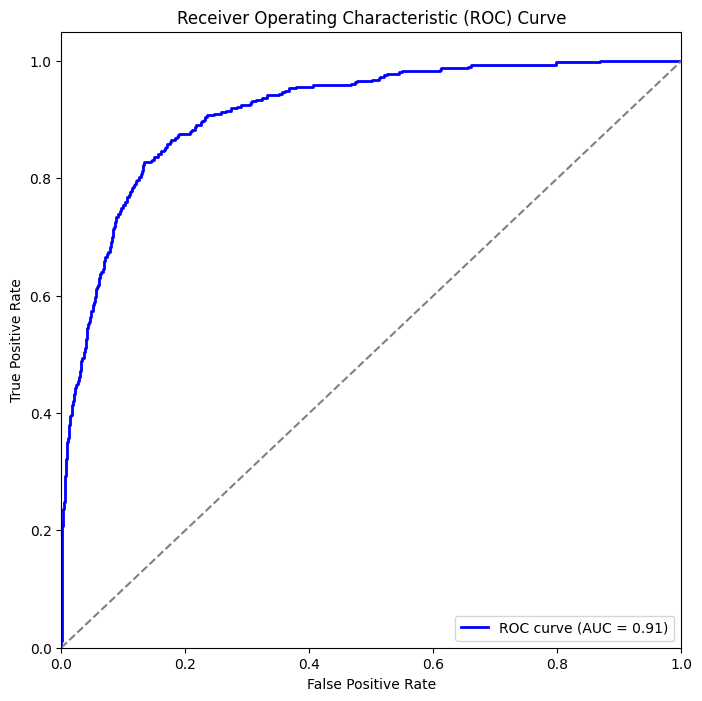

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


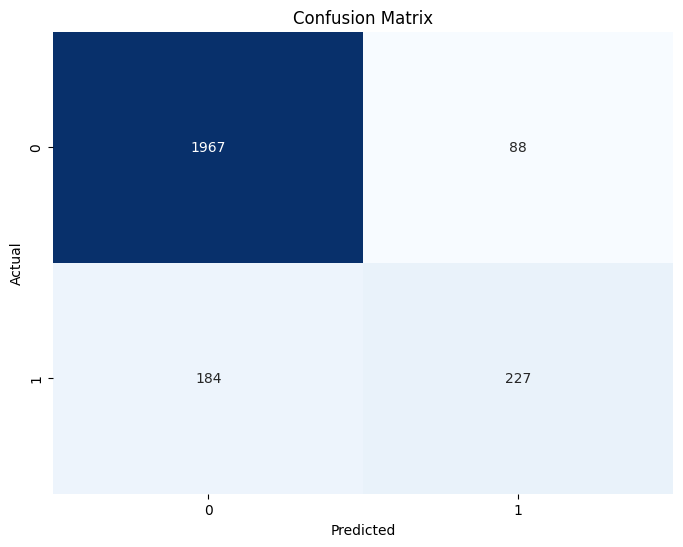

In [115]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred_proba > 0.5).astype(int)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


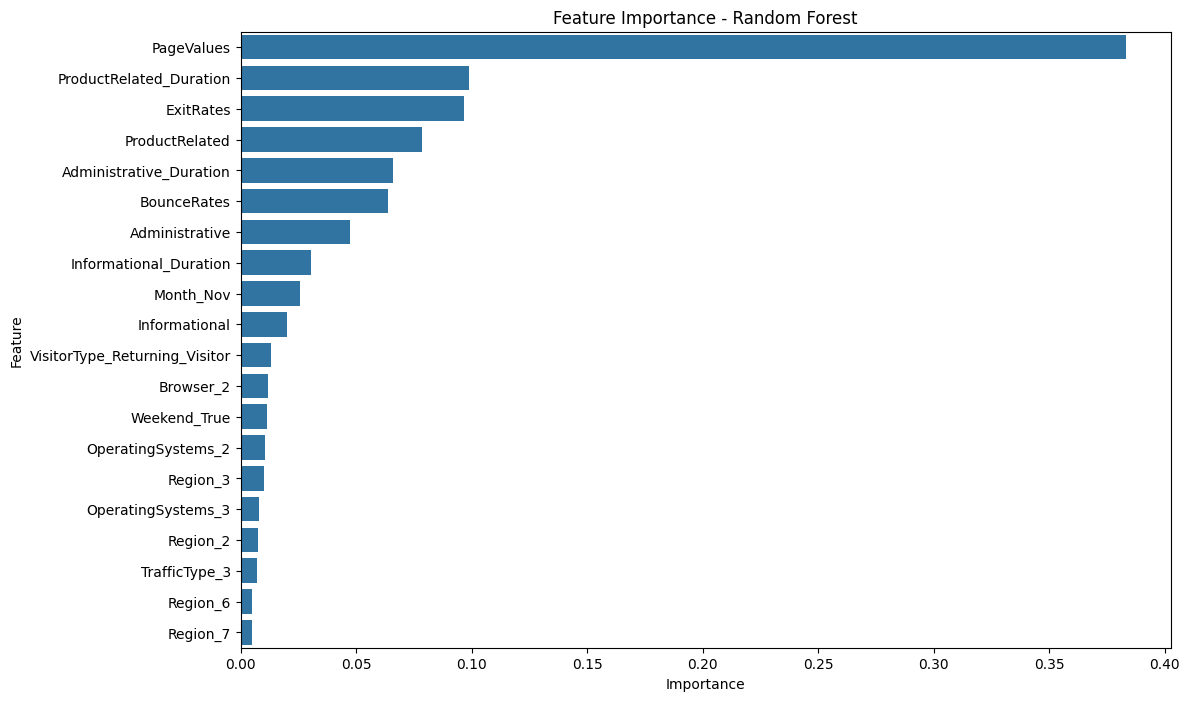

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot feature importance for Random Forest
rf_model = models["Random Forest"]
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a DataFrame for the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train_selected.columns[indices],
    'Importance': importances[indices]
})

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance - Random Forest')
plt.show()
